In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from icosphere_py.shapes import RegIcos

#### Create the base regular icosahedron. Vertices in Cartesian coords are stored in a dataframe in `.vertices`

In [2]:
icos = RegIcos(100)
icos.vertices

,x,y,z,iteration,neighbours
0,-52.573111,85.065081,0.000000,0,"[7, 10, 1, 5, 11]"
1,52.573111,85.065081,0.000000,0,"[7, 8, 0, 5, 9]"
2,-52.573111,-85.065081,0.000000,0,"[6, 3, 4, 10, 11]"
3,52.573111,-85.065081,0.000000,0,"[6, 8, 4, 2, 9]"
4,0.000000,-52.573111,85.065081,0,"[9, 3, 2, 5, 11]"
5,0.000000,52.573111,85.065081,0,"[9, 1, 4, 0, 11]"
6,0.000000,-52.573111,-85.065081,0,"[7, 3, 8, 2, 10]"
7,0.000000,52.573111,-85.065081,0,"[8, 1, 6, 0, 10]"
8,85.065081,0.000000,-52.573111,0,"[9, 3, 1, 6, 7]"
9,85.065081,0.000000,52.573111,0,"[1, 3, 4, 5, 8]"


#### Create derived "icospheres" by repeated subdivision

My code is very slow so even only 3 iterations takes a while...

In [3]:
%time poly2 = icos.subdivide()
%time poly3 = poly2.subdivide()
%time poly4 = poly3.subdivide()

/exports/csce/datastore/geos/users/s1556306/code2/icosphere_py/icosphere_py/shapes.py:235: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  newvertices = pd.concat((newvertices, self.vertices), ignore_index=True)


CPU times: user 246 ms, sys: 4.43 ms, total: 250 ms
Wall time: 242 ms
CPU times: user 913 ms, sys: 0 ns, total: 913 ms
Wall time: 910 ms
CPU times: user 3.81 s, sys: 0 ns, total: 3.81 s
Wall time: 3.81 s


#### Plot them by drawing their edges

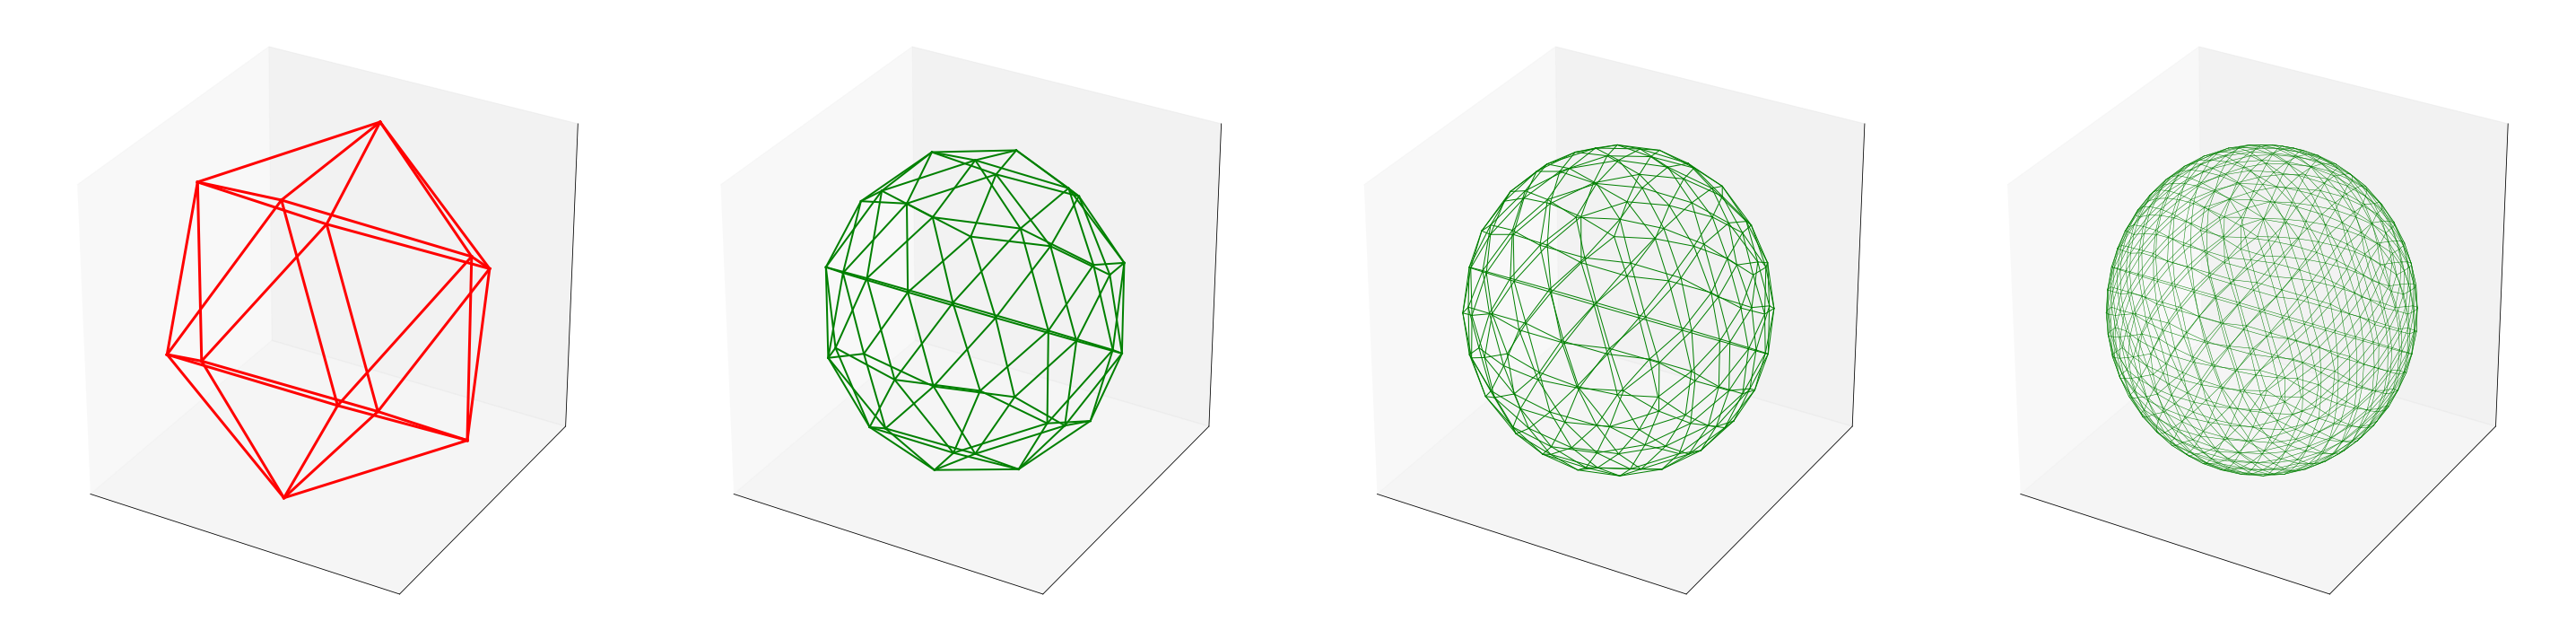

In [4]:
def noaxticks(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(141, projection='3d'); noaxticks(ax)
icos.drawedges(ax,'r',3)

ax = fig.add_subplot(142, projection='3d'); noaxticks(ax)
poly2.drawedges(ax,'g',2)

ax = fig.add_subplot(143, projection='3d'); noaxticks(ax)
poly3.drawedges(ax,'g',1)

ax = fig.add_subplot(144, projection='3d'); noaxticks(ax)
poly4.drawedges(ax,'g',0.5)

fig.tight_layout()

In [5]:
poly2.get_dualfaces()

[]

(-100, 100)

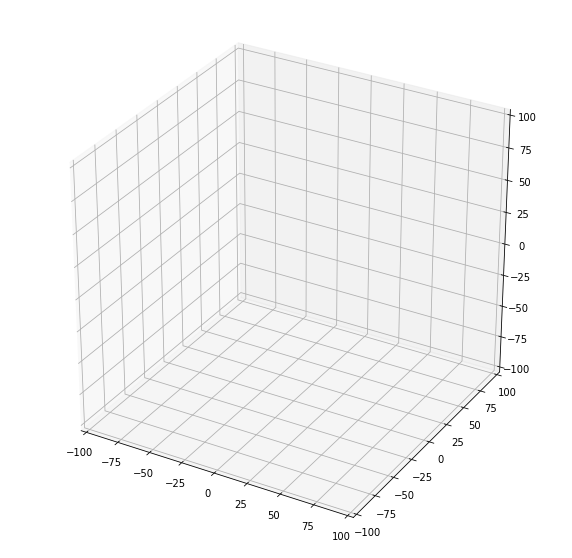

In [6]:
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

faces = poly2.get_dualfaces()
    
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#poly.drawverts(ax,'ro')
#poly.drawedges(ax,'b',0.5)

facecolors = [plt.cm.jet(x) for x in np.random.rand(len(faces))]
patches = Poly3DCollection(faces, facecolors=facecolors)
ax.add_collection3d(patches)

ax.set_xlim3d(-100,100)
ax.set_ylim3d(-100,100)
ax.set_zlim3d(-100,100)

#### Get vertices in spherical coordinates

In [7]:
icos.get_verts_thetaphi()

(array([ 90.        ,  90.        ,  90.        ,  90.        ,
         31.71747441,  31.71747441, 148.28252559, 148.28252559,
        121.71747441,  58.28252559, 121.71747441,  58.28252559]),
 array([121.71747441,  58.28252559, 238.28252559, 301.71747441,
        270.        ,  90.        , 270.        ,  90.        ,
          0.        ,   0.        , 180.        , 180.        ]))

#### Do several iterations and save them all to a file and reload

Build a large one and save the points <br>
Number of subdivisions, k, gives number of vertices, V: V = 2 + 10*2^(2k) <br>
k:  V <br>
0:  12 <br>
1:  42 <br>
2:  162 <br>
3:  642 <br>
4:  2562 <br>
5:  10242 <br>
6:  40962

In [8]:
refrad = 6371200
icos = RegIcos(refrad)
for k in range(1,7):
    %time icos = icos.subdivide()
    print("Done iteration", k, "of 6")
    theta, phi = icos.get_verts_thetaphi()
    icosverts = pd.DataFrame({'theta':theta, 'phi':phi})
    icosverts.to_hdf('icosphere_data.h5', str(len(theta)))
# Now load with:
df = pd.read_hdf('icosphere_data.h5', '40962')
theta = df.theta
phi = df.phi

CPU times: user 237 ms, sys: 5.03 ms, total: 242 ms
Wall time: 235 ms
Done iteration 1 of 6


/home/s1556306/miniconda3_envs/py37/lib/python3.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '42'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


CPU times: user 998 ms, sys: 8.84 ms, total: 1.01 s
Wall time: 1 s
Done iteration 2 of 6


/home/s1556306/miniconda3_envs/py37/lib/python3.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '162'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


CPU times: user 3.86 s, sys: 3.36 ms, total: 3.87 s
Wall time: 3.86 s
Done iteration 3 of 6


/home/s1556306/miniconda3_envs/py37/lib/python3.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '642'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


CPU times: user 18.5 s, sys: 29.5 ms, total: 18.6 s
Wall time: 18.6 s
Done iteration 4 of 6


/home/s1556306/miniconda3_envs/py37/lib/python3.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2562'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


CPU times: user 2min 7s, sys: 105 ms, total: 2min 7s
Wall time: 2min 7s
Done iteration 5 of 6


/home/s1556306/miniconda3_envs/py37/lib/python3.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '10242'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


CPU times: user 23min, sys: 618 ms, total: 23min 1s
Wall time: 22min 59s
Done iteration 6 of 6


/home/s1556306/miniconda3_envs/py37/lib/python3.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '40962'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


In [9]:
theta, phi

(0         92.910599
 1         94.071637
 2         92.908770
 3         94.438861
 4         93.857171
 5         92.328252
 6         90.582577
 7         91.747274
 8         92.108570
 9         90.582577
 10        91.525447
 11        90.000000
 12        91.745445
 13        91.747276
 14        90.582579
 15        90.582579
 16        90.000000
 17        94.804264
 18        93.275350
 19        95.167419
 20        93.637100
 21        94.583452
 22        89.417423
 23        89.417421
 24        91.164583
 25        88.835417
 26        92.468904
 27        93.997949
 28        93.411834
 29        92.691106
             ...    
 40932    120.000000
 40933     72.000000
 40934    108.000000
 40935    120.000000
 40936     60.000000
 40937     72.000000
 40938     36.000000
 40939      0.000000
 40940     36.000000
 40941     36.000000
 40942     36.000000
 40943    144.000000
 40944    180.000000
 40945    144.000000
 40946    144.000000
 40947    144.000000
 40948     90